# YouTube Data API v3 - Mapping Corridor Digital's Network

In [1]:
pwd

'/Users/DanOvadia/Projects/YoutubeChannels/notebooks'

In [2]:
cd ..

/Users/DanOvadia/Projects/YoutubeChannels


### Python Libraries

In [3]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

## Custom modules

In [4]:
#import config # api_key is stored in config.py
from modules import youtube_requests # Functions for making youtube_requests
from modules import data_processing # Functions for data processing
from modules import network_graphs # Functions for creating a network graph

Run autoloader to automatically reimport custom modules

In [5]:
%load_ext autoreload

%autoreload 1

%aimport modules.network_graphs
%aimport modules.youtube_requests
%aimport modules.data_processing

## Create a list of channels to graph network

Here we are graphing Corridor, Corridor Crew, Corridor Cast, Node, and the Guilletine Channel. These are all channels related to the [Corridor Digital](https://www.youtube.com/user/CorridorDigital) production studio.

In [6]:
NBC_AND_FOX = ['UCeY0bbntWzzVIaj2z3QigXg', # NBC
              'UCXIJgqnII2ZOINSWNOGFThA'] # Fox

In [7]:
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N-X7t0nQ',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

# Youtube Channel Details by Network

In [8]:
%%time
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(
    CORRIDOR_FIVE, 3)
#CORRIDOR_FIVE
# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G using matplotlib - gets messy with lots of data
#network_graphs.graph_nx_graph(G)

Channel_details_by_network
Have not seen this list, issuing request and caching.
5
25 total neighbors; 0 out of 5 channels do not feature channels
20
97 total neighbors; 2 out of 20 channels do not feature channels
50
86
255 total neighbors; 11 out of 86 channels do not feature channels
50
100
150
188
Time elapsed create graph:  0.005522999999999723
Time elapsed channelId list:  0.00010900000000013677
Time elapsed determine position:  2.3873150000000005
Time elapsed Setting Attributes:  0.002953999999999901
CPU times: user 2.81 s, sys: 93.1 ms, total: 2.9 s
Wall time: 13.2 s


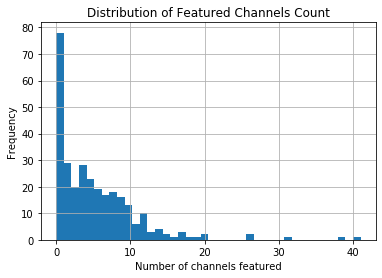

In [9]:
DF.hist(column='outDegree', bins=40)
plt.title(label='Distribution of Featured Channels Count')
plt.xlabel(xlabel='Number of channels featured')
plt.ylabel(ylabel='Frequency');

Here we see most channels do not feature more than 10 other channels on their profile pages. Some feature a lot more, with one as an outlier featuring 40 other channels.

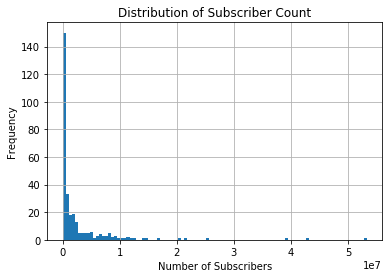

In [10]:
DF.hist(column = 'subscribers', bins=100)
plt.title(label='Distribution of Subscriber Count')
plt.xlabel(xlabel='Number of Subscribers')
plt.ylabel(ylabel='Frequency');

Here we see that the distribution of subscriber counts for each channel is not limited to highly subscribed channels. In fact there are a lot of channels with less than 100k subscribers.

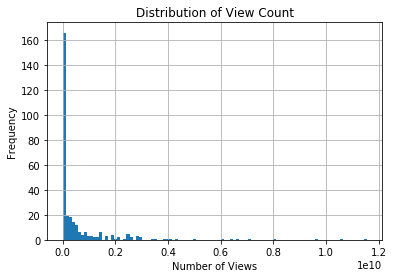

In [11]:
DF.hist(column = 'views', bins=100)
plt.title(label='Distribution of View Count')
plt.xlabel(xlabel='Number of Views')
plt.ylabel(ylabel='Frequency');

Here we see the same thing as with subscriber count; there are a lot of channels that do not have a lot of views, even though we are coming from a network that has some channels that have over 1 billion views.

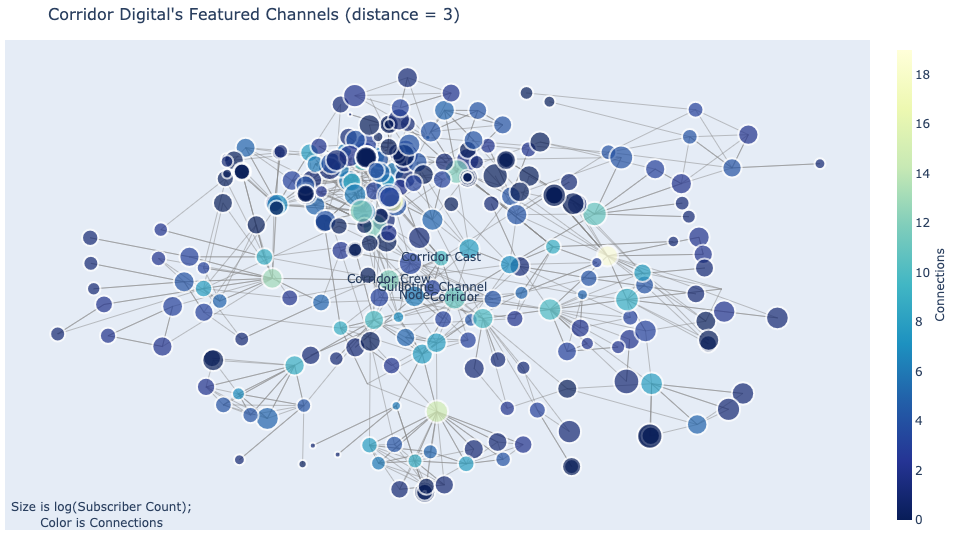

In [12]:
fig = network_graphs.plotly_network_graph(G, "Connections", "Corridor Digital's Featured Channels (distance = 3)")
fig # Interactive version of the figure for notebooks

Here we see Corridor Digital's network at a distance of 3 or less away. The colors represent the number of outgoing connections from each node. Those with high values (yellow) feature more channels than those with lower values (blue).

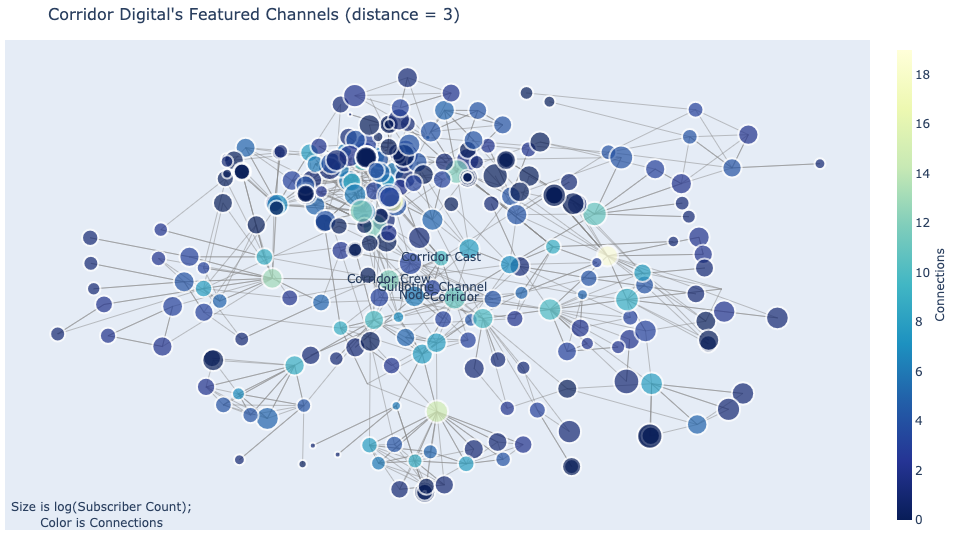

In [13]:
fig

In [39]:
fig.write_image('images/corridor-3.png')

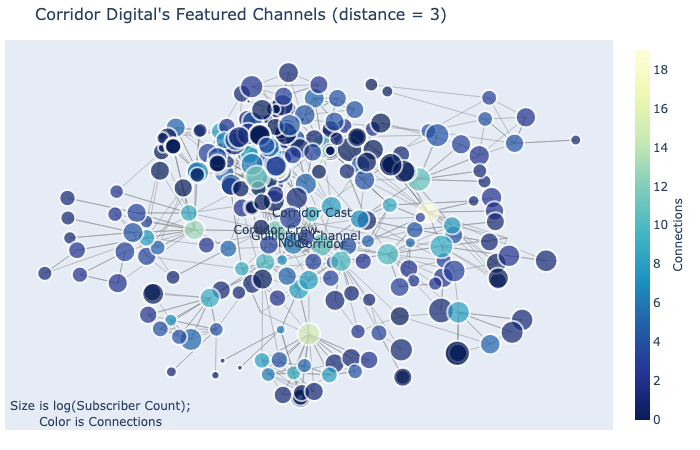

In [15]:
fig.show("png")

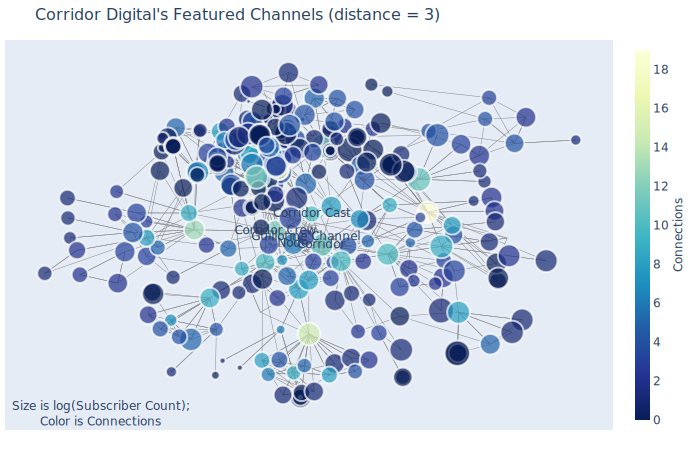

In [16]:
# Show figure for GitHub Readme
fig.show("svg")

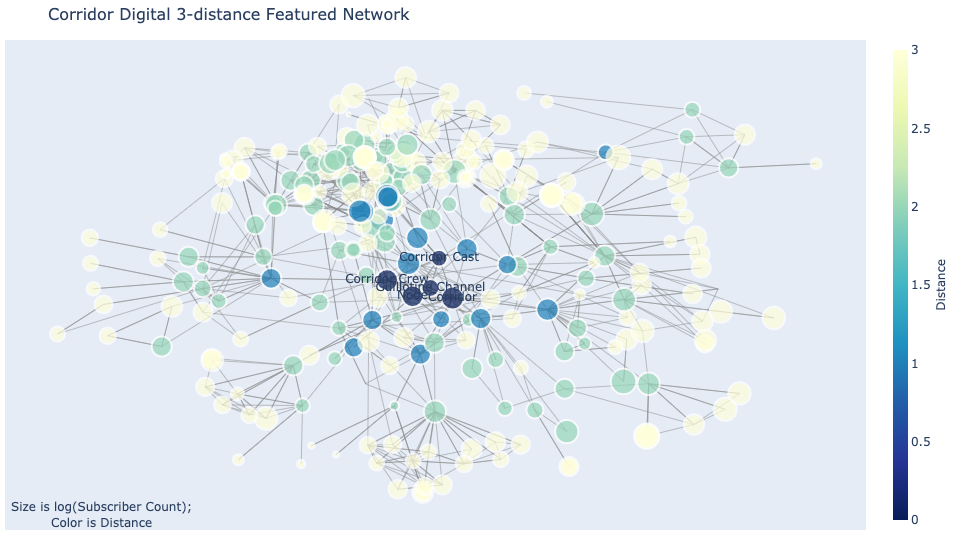

In [17]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network')
fig

Here we again see Corridor Digital's network at a distance of 3 or less. In this case the colors represent the distance from our channel origins. Blue represents origin, ligh blue represents 1 channels away, green represents 2 channels away, and yellow represents 3 channels away.

It could be possible for a channel that is 3 channels away from Corridor Digital to then reference one of the Corridor channels back, but this would not change their distance, as going *from* a Corridor Channel *to* that other channel, required three steps to crawl to that channel. Directionality in this case matters.

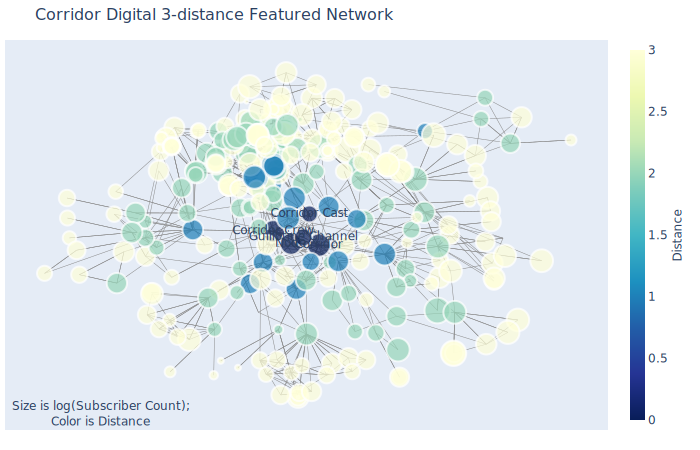

In [18]:
# Show figure for GitHub
fig.show("svg")

## Page Rank, In-Degree centrality, Betweeness Centrality, and In-Degree value

In [19]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

FEATURES = ['title','outDegree','degree','in_degree','betweenness_centrality','in_degree_centrality','page_rank','subscribers','views','id']

### Sort channels by page rank

Page rank is a relative measure of importance for a specific channel with the network. 

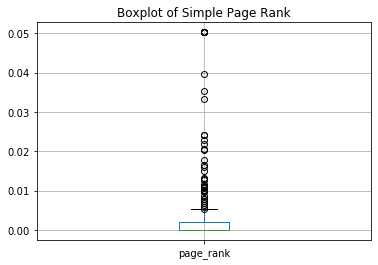

In [20]:
DF.boxplot(column='page_rank')
plt.title("Boxplot of Simple Page Rank");

In [21]:
DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)

title  outDegree  degree  in_degree  betweenness_centrality  \
67    Carpool Critics          6      11          5                0.000000   
87        Techquickie          6      12          6                0.000006   
6     Linus Tech Tips          6      13          7                0.007870   
54          LMG Clips          6      12          6                0.000006   
39       ShortCircuit          6      11          5                0.000000   
33         TechLinked          6      12          6                0.000006   
3       Corridor Crew         12      21          9                0.116097   
71  Channel Super Fun          4      10          6                0.000000   

    in_degree_centrality  page_rank  subscribers       views  \
67              0.016779   0.050236        49600      525909   
87              0.020134   0.050236      3560000   533866655   
6               0.023490   0.050236     11700000  3998358549   
54              0.020134   0.050236       189000    23024235   
39              0.016779   0.050236       990000    63198932   
33              0.020134   0.050236      1290000   188596076   
3               0.030201   0.039647      4170000   729374769   
71              0.020134   0.035244       743000    98131472   

                          id  
67  UCt-oJR5teQIjOAxCmIQvcgA  
87  UC0vBXGSyV14uvJ4hECDOl0Q  
6   UCXuqSBlHAE6Xw-yeJA0Tunw  
54  UCFLFc8Lpbwt4jPtY1_Ai5yA  
39  UCdBK94H6oZT2Q7l0-b0xmMg  
33  UCeeFfhMcJa1kjtfZAGskOCA  
3   UCSpFnDQr88xCZ80N-X7t0nQ  
71  UCBZiUUYeLfS5rIj4TQvgSvA

In [22]:
sorted_pgrank_list = list(DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)['id'])

Lets take a look at these channels listed on the graph

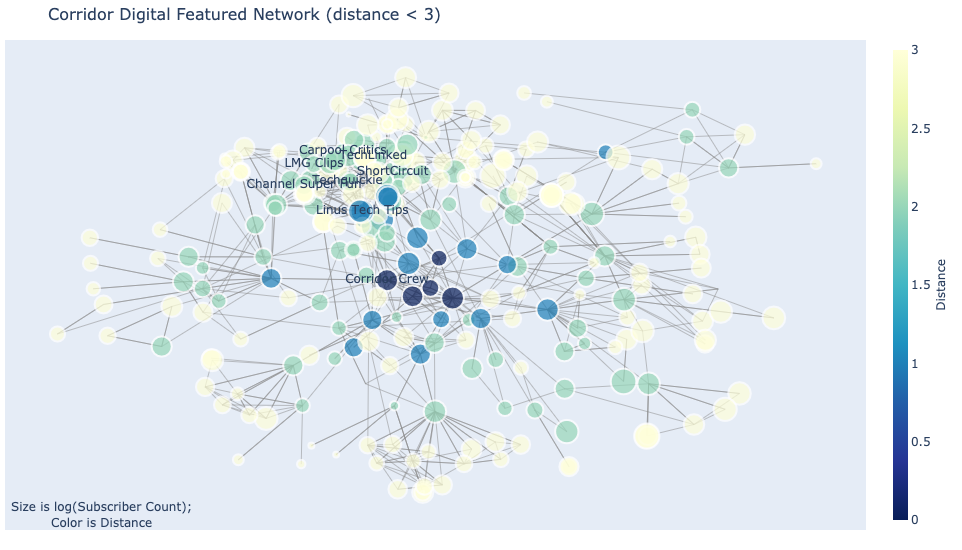

In [23]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital Featured Network (distance < 3)',
                            display_list=sorted_pgrank_list)
fig

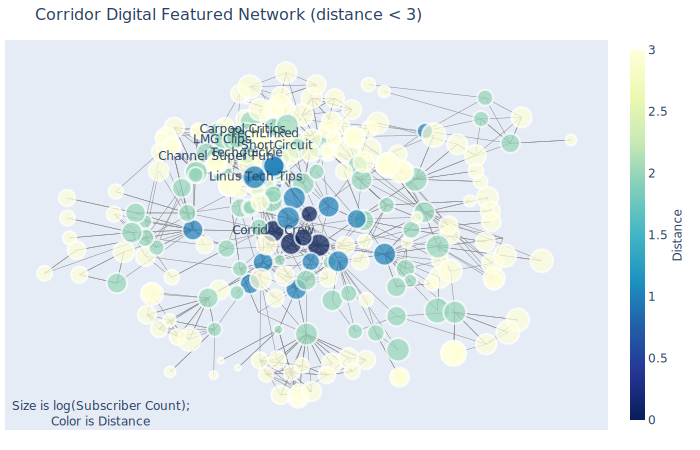

In [24]:
fig.show('svg')

### Sort channels by betweenness centrality.

Betweenness centrality is a measure of connectivity for a node in a network. A higher betweenness centrality implies that the node is a critical pathway for other nodes to connect across the graph.

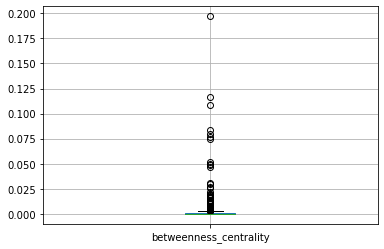

In [25]:
DF.boxplot(column='betweenness_centrality');

In [26]:
DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)

title  outDegree  degree  in_degree  betweenness_centrality  \
1          Corridor         11      29         18                0.196875   
3     Corridor Crew         12      21          9                0.116097   
10  devinsupertramp         10      25         15                0.108680   
22        Nukazooka          8      19         11                0.083349   
23        Mike Diva          7      15          8                0.079203   
13        Film Riot         13      23         10                0.076546   
15    SoKrispyMedia         10      18          8                0.074248   
0     Corridor Cast         10      14          4                0.051319   

    in_degree_centrality  page_rank  subscribers       views  \
1               0.060403   0.033402      8130000  1484585446   
3               0.030201   0.039647      4170000   729374769   
10              0.050336   0.012604      5940000  1445760022   
22              0.036913   0.024097      2260000   673316959   
23              0.026846   0.011152       650000   143239506   
13              0.033557   0.015914      1680000   192769153   
15              0.026846   0.015050      1170000   324671918   
0               0.013423   0.021753       111000     5066335   

                          id  
1   UCsn6cjffsvyOZCZxvGoJxGg  
3   UCSpFnDQr88xCZ80N-X7t0nQ  
10  UCwgURKfUA7e0Z7_qE3TvBFQ  
22  UCQqi--mpTFtGNim0WCtPH-A  
23  UC6Je0KLSDuKLfKs1lEBzKrQ  
13  UC6P24bhhCmMPOcujA9PKPTA  
15  UCKo61AAaRD00ibCWJZ321MQ  
0   UCNSeDrWRGxx5p2l3tj7RWQw

In [27]:
sorted_btwn_list = list(DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)['id'])

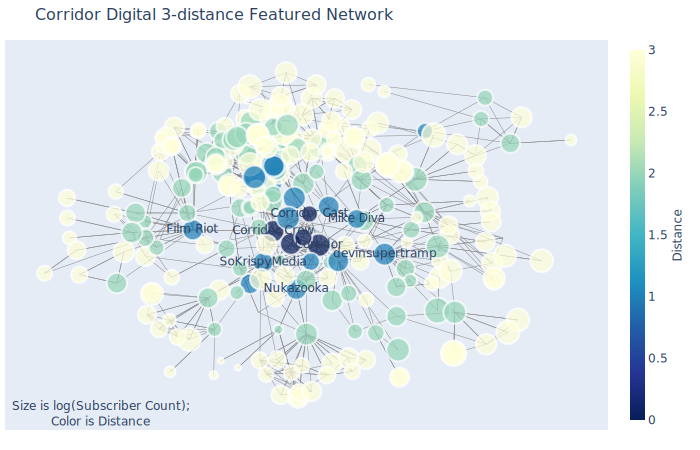

In [28]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network',
                            display_list=sorted_btwn_list)
fig
fig.show('svg')

### Sort channels by in_degree centrality.

In degree centrality is a measure of a nodes importance as a reference from other channels. A high in degree centrality value implies that the node is highly referenced by other channels within this network.

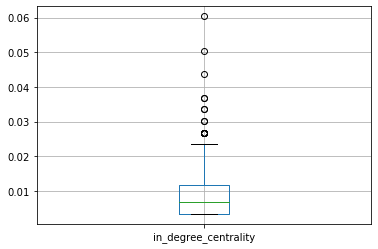

In [29]:
DF.boxplot(column='in_degree_centrality');

In [30]:
DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)

title  outDegree  degree  in_degree  betweenness_centrality  \
1          Corridor         11      29         18                0.196875   
10  devinsupertramp         10      25         15                0.108680   
52           TomSka         15      28         13                0.048996   
89         LetsPlay          1      12         11                0.000017   
22        Nukazooka          8      19         11                0.083349   
20       RocketJump          3      13         10                0.025718   
13        Film Riot         13      23         10                0.076546   
3     Corridor Crew         12      21          9                0.116097   

    in_degree_centrality     page_rank  subscribers       views  \
1               0.060403  3.340219e-02      8130000  1484585446   
10              0.050336  1.260390e-02      5940000  1445760022   
52              0.043624  1.658634e-02      6470000  1673856377   
89              0.036913  3.642112e-17      3850000  2452330087   
22              0.036913  2.409708e-02      2260000   673316959   
20              0.033557  1.425689e-10      9000000  1910300317   
13              0.033557  1.591368e-02      1680000   192769153   
3               0.030201  3.964711e-02      4170000   729374769   

                          id  
1   UCsn6cjffsvyOZCZxvGoJxGg  
10  UCwgURKfUA7e0Z7_qE3TvBFQ  
52  UCOYWgypDktXdb-HfZnSMK6A  
89  UCkxctb0jr8vwa4Do6c6su0Q  
22  UCQqi--mpTFtGNim0WCtPH-A  
20  UCDsO-0Yo5zpJk575nKXgMVA  
13  UC6P24bhhCmMPOcujA9PKPTA  
3   UCSpFnDQr88xCZ80N-X7t0nQ

Lets also look at the distribution of in degree centrality values.

In [31]:
sorted_indeg_list = list(DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)['id'])

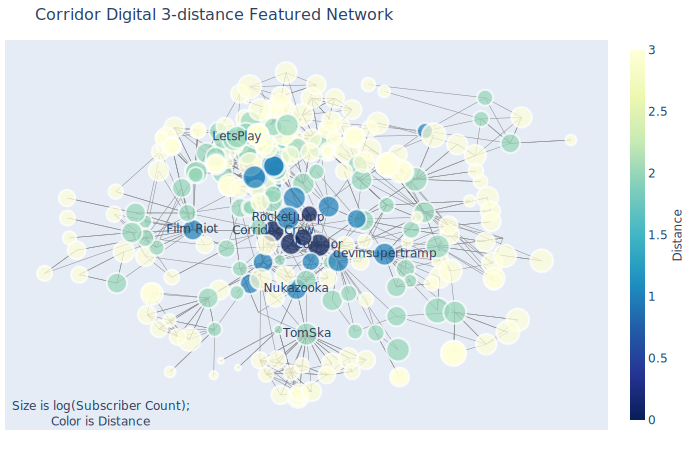

In [32]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network',
                            display_list=sorted_indeg_list)
fig.show('svg')

## Strongly Connected Components

Since this graph is a directional graph, and not all references exist in both directions. It is possible to travel through the graph of channels and not be able to return. 

Strongly connected components are portions of the graph that allows you to return to all other nodes in the graph.

In [33]:
# Create a list of strongly connected components
scc_list = [scc for scc in nx.strongly_connected_components(G)]

# Grab the largest strongly connected component
largest_scc_index = [i for i,cn in enumerate(scc_list) if len(cn) == max([len(cnn) for cnn in scc_list])][0]

# Graph out the subgraph for the largest subset of strongly connected components
H = G.subgraph(list(scc_list[largest_scc_index]))

Plot of our subgraph of strongly connected components

In [34]:
#network_graphs.graph_nx_graph(H)
fig = network_graphs.plotly_network_graph(H, 
                                          'Distance', 
                                          title='Strongly Connected Subgraph of Corridor Digital')

Here we see that the majority of the bottom left of the graph is excluded. Meaning while there were references going from the Corridor community to Rooster Teeth, Slow Mo Guys, Hulu, and etc. There did not exist a path referencing anyone in the Corridor community (at least within a distance of three from Corridor), completely separating the graph.

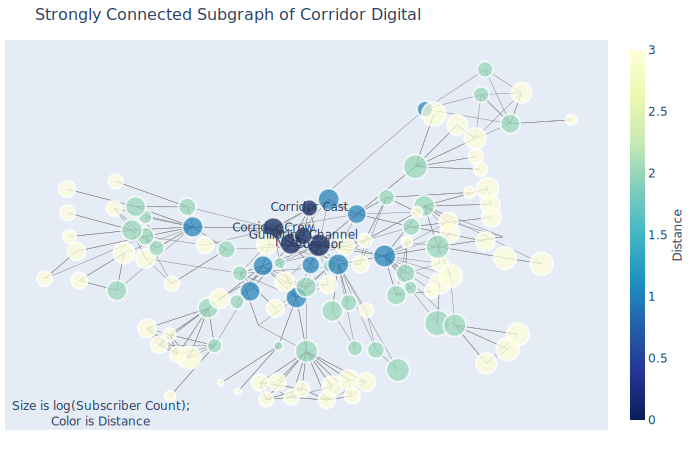

In [35]:
fig.show('svg')

In [36]:
pwd

'/Users/DanOvadia/Projects/YoutubeChannels'

In [41]:
fig = network_graphs.plotly_network_graph(H, 'Connections')


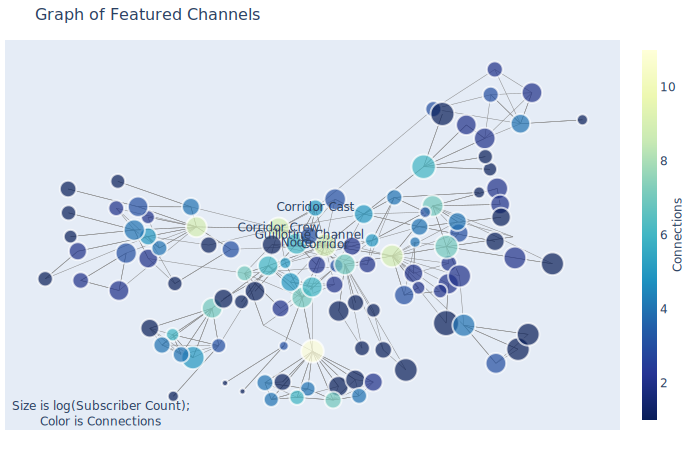

In [42]:
fig.write_html('images/corridor.html')
fig.show('svg')